<a href="https://colab.research.google.com/github/SAHIL9581/LIVE-AI-CLASSES/blob/main/Foundations_to_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<function matplotlib.pyplot.show(close=None, block=None)>

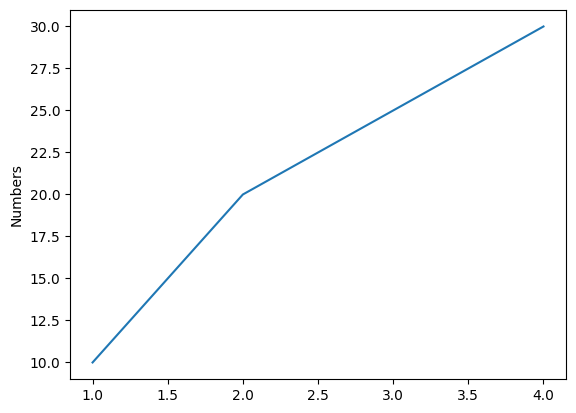

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot([1,2,3,4],[10,20,25,30])
plt.ylabel('Numbers')
plt.show

In [4]:
# Pandas: Creating DataFrames
import pandas as pd

data = {'Depth': [1000, 1500, 2000, 2500],
        'GammaRay': [85, 70, 65, 80]}
df = pd.DataFrame(data)
print(df)

   Depth  GammaRay
0   1000        85
1   1500        70
2   2000        65
3   2500        80


In [5]:
# Pandas: Indexing and Slicing
import pandas as pd

data = {'Depth': [1000, 1500, 2000, 2500],
        'GammaRay': [85, 70, 65, 80]}
df = pd.DataFrame(data)

print(df['GammaRay'])
print(df[1:3])

0    85
1    70
2    65
3    80
Name: GammaRay, dtype: int64
   Depth  GammaRay
1   1500        70
2   2000        65


In [6]:
# Pandas: Basic Operations (Filtering and Grouping)
import pandas as pd

data = {'Depth': [1000, 1500, 2000, 2500],
        'GammaRay': [85, 70, 65, 80]}
df = pd.DataFrame(data)

filtered_df = df[df['GammaRay'] > 70]
print(filtered_df)

grouped_df = df.groupby('GammaRay').mean()
print(grouped_df)

   Depth  GammaRay
0   1000        85
3   2500        80
           Depth
GammaRay        
65        2000.0
70        1500.0
80        2500.0
85        1000.0


In [7]:
# NumPy: Creating Arrays
import numpy as np

arr = np.array([1, 2, 3, 4, 5])
print(arr)

[1 2 3 4 5]


In [8]:
# NumPy: Indexing and Slicing
import numpy as np

arr = np.array([1, 2, 3, 4, 5])

print(arr[2])
print(arr[1:4])

3
[2 3 4]


In [9]:
# NumPy: Mathematical Operations
import numpy as np

arr = np.array([1, 2, 3, 4, 5])

arr_add = arr + 2
print(arr_add)
print(np.mean(arr))

[3 4 5 6 7]
3.0


In [14]:
# Merging Data
import pandas as pd

gr_data = pd.DataFrame({'Depth': [1000, 1500, 2000, 2500], 'GR': [85, 70, 65, 80]})
nphi_data = pd.DataFrame({'Depth': [1000, 1500, 2000, 2500], 'NPHI': [0.25, 0.30, 0.35, 0.40]})
dphi_data = pd.DataFrame({'Depth': [1000, 1500, 2000, 2500], 'DPHI': [0.15, 0.20, 0.25, 0.30]})

merged_data = pd.merge(gr_data, nphi_data, on='Depth')
merged_data = pd.merge(merged_data, dphi_data, on='Depth')
print(merged_data)

   Depth  GR  NPHI  DPHI
0   1000  85  0.25  0.15
1   1500  70  0.30  0.20
2   2000  65  0.35  0.25
3   2500  80  0.40  0.30


In [15]:
# Reshaping Data (Pandas Pivot)
import pandas as pd

pivot_data = pd.DataFrame({'Depth': [1000, 1500, 2000, 2500, 1000, 1500, 2000, 2500],
                           'LogType': ['GR', 'GR', 'GR', 'GR', 'NPHI', 'NPHI', 'NPHI', 'NPHI'],
                           'Value': [85, 70, 65, 80, 0.25, 0.30, 0.35, 0.40]})

pivoted_data = pivot_data.pivot(index='Depth', columns='LogType', values='Value')
print(pivoted_data)

LogType    GR  NPHI
Depth              
1000     85.0  0.25
1500     70.0  0.30
2000     65.0  0.35
2500     80.0  0.40


In [16]:
# Reshaping Data (NumPy Reshape)
import numpy as np

arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
reshaped_arr = arr.reshape(1, 9)
print(reshaped_arr)

[[1 2 3 4 5 6 7 8 9]]


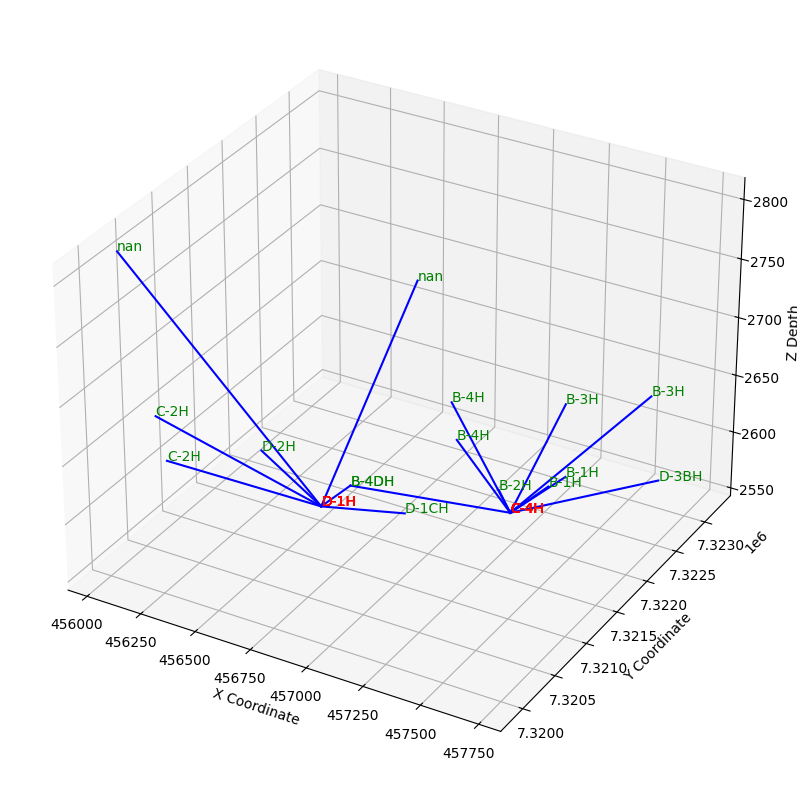

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection

# Load the CSV into a DataFrame (replace the file path with your file)
df_entity_connections = pd.read_csv('df_entity_connections.csv')

# Create a figure with a larger size
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot each well connection as a line between start and end points and add well names
for i in range(len(df_entity_connections)):
    x_line = [df_entity_connections['xstart'][i], df_entity_connections['xend'][i]]
    y_line = [df_entity_connections['ystart'][i], df_entity_connections['yend'][i]]
    z_line = [df_entity_connections['zstart'][i], df_entity_connections['zend'][i]]

    # Plot the well connection line
    ax.plot(x_line, y_line, z_line, color='b')

    # Add well names at the start and end points
    ax.text(df_entity_connections['xstart'][i], df_entity_connections['ystart'][i], df_entity_connections['zstart'][i],
            df_entity_connections['start_entity'][i], color='red', fontsize=10)
    ax.text(df_entity_connections['xend'][i], df_entity_connections['yend'][i], df_entity_connections['zend'][i],
            df_entity_connections['end_entity'][i], color='green', fontsize=10)

# Add labels
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Depth')

# Show the 3D plot with well names
plt.show()

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout

# Load your data (use the CSV files you have)
df_merged = pd.read_csv('merged_data.csv')

# Task (b) - Preparing the data
# We drop the rows where 'end_entity' is not known (NaN) in our training data
df_task_b = df_merged.dropna(subset=['end_entity'])

# Select the relevant features and the target (distance)
features_b = ['X', 'Y', 'Z', 'xend', 'yend', 'zend']
X_b = df_task_b[features_b].values
y_b = df_task_b['distance'].values

# Split the data into training and testing sets
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2, random_state=42)

# Standardize the data
scaler_b = StandardScaler()
X_train_b = scaler_b.fit_transform(X_train_b)
X_test_b = scaler_b.transform(X_test_b)

# Reshape the input data for CNN (adding a dimension for CNN input)
X_train_b = X_train_b.reshape(X_train_b.shape[0], X_train_b.shape[1], 1)
X_test_b = X_test_b.reshape(X_test_b.shape[0], X_test_b.shape[1], 1)

# CNN Model for Task (b)
model_b = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train_b.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1)  # Output layer for regression (distance prediction)
])

# Compile the model
model_b.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
model_b.fit(X_train_b, y_train_b, epochs=10, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model on the test data
test_loss_b, test_mse_b = model_b.evaluate(X_test_b, y_test_b)
print(f'Test Mean Squared Error: {test_mse_b}')

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 283ms/step - loss: 611581.5625 - mean_squared_error: 611581.5625 - val_loss: 420687.0625 - val_mean_squared_error: 420687.0625
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 651199.1250 - mean_squared_error: 651199.1250 - val_loss: 420487.6562 - val_mean_squared_error: 420487.6562
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 615301.3125 - mean_squared_error: 615301.3125 - val_loss: 420302.7500 - val_mean_squared_error: 420302.7500
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 604157.6875 - mean_squared_error: 604157.7500 - val_loss: 420117.1562 - val_mean_squared_error: 420117.1562
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 583999.6250 - mean_squared_error: 583999.6250 - val_loss: 419933.5312 - val_mean_squared_error: 419933.5312
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 618322.8125 - mean_squared_error: 618322.8125 - val_loss: 419745.9062 - val_mean_squared_error: 419745.9062
Epoch 7/10
2/2 ━━